In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import warnings 

from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import accuracy_score, log_loss

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

set_config(display="diagram")
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\user\Downloads\data (1)\data\regression\train.csv", sep=",")
print(train.shape)
train.tail()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
test = pd.read_csv(r"C:\Users\user\Downloads\data (1)\data\regression\test.csv", sep=",")
print(test.shape)
test.tail()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
train.set_index('Id', inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.set_index('Id', inplace=True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train = train.drop_duplicates()
print(train.shape)

(1460, 80)


In [7]:
test = test.drop_duplicates()
print(test.shape)

(1459, 79)


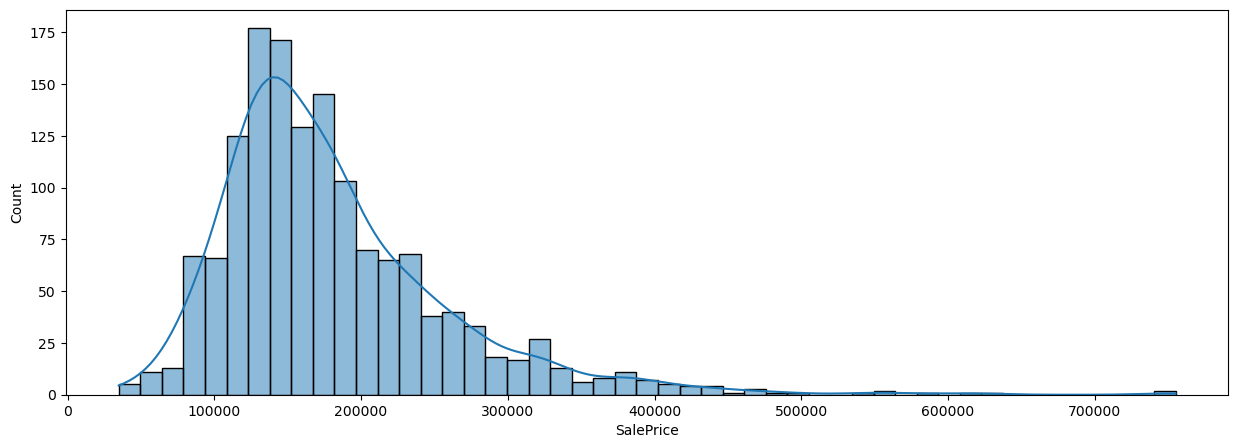

In [8]:
plt.figure(figsize=(15, 5))
sns.histplot(data=train, x="SalePrice", kde=True)
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [11]:
Missing_values_table = pd.DataFrame({'Missing Values Flag': train.isnull().any()})
Missing_values_table['Missing Values Flag'] = Missing_values_table['Missing Values Flag'] == True

filtered_table = Missing_values_table[Missing_values_table['Missing Values Flag']]

filtered_table

,Missing Values Flag
LotFrontage,True
Alley,True
MasVnrType,True
MasVnrArea,True
BsmtQual,True
BsmtCond,True
BsmtExposure,True
BsmtFinType1,True
BsmtFinType2,True
Electrical,True


In [12]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


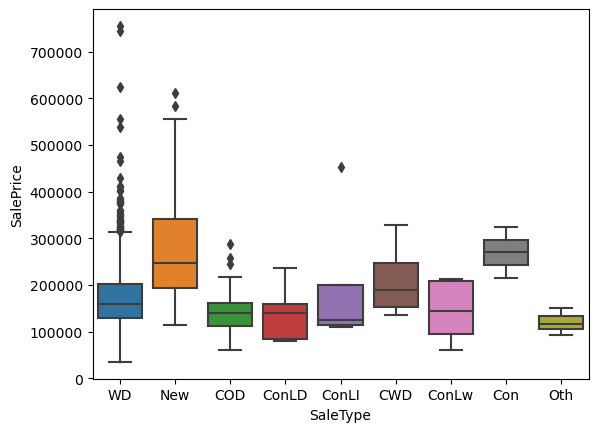

In [13]:
sns.boxplot(x='SaleType', y='SalePrice', data=train)
plt.show()

In [14]:
train=train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
train.shape

(1460, 76)

In [15]:
test=test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test.shape

(1459, 75)

In [17]:
#Attributes with so many values or which are not nominal and will not be able and help our model if mapped
additional_categoricals = [
    'MSSubClass', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType2', 
    'Heating', 'Electrical', 'GarageType', 'SaleType', 'Utilities', 'Neighborhood'
]

In [18]:
#Drop those with so many values or are not nominal and will not be able and help our model if mapped

train = train.drop(additional_categoricals, axis=1)
print(train.shape)
test = test.drop(additional_categoricals, axis=1)
print(test.shape)

(1460, 60)
(1459, 59)


In [19]:
#Map the categorical variables
categorical_variables = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 
    'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 'ExterCond', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
    'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition'
]

mapping_dict = {
    'MSZoning': {'A': 0, 'C': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7},
    'Street': {'Grvl': 0, 'Pave': 1},
    'LotShape': {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
    'LandContour': {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3},
    'LotConfig': {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4},
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
    'BldgType': {'1Fam': 0, '2FmCon': 1, 'Duplx': 2, 'TwnhsE': 3, 'TwnhsI': 4},
    'MasVnrType': {'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'CentralAir': {'N': 0, 'Y': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageFinish': {'Fin': 2, 'RFn': 1, 'Unf': 0, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},
    'SaleCondition': {'Normal': 0, 'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Partial': 5}
}

In [20]:
for var in categorical_variables:
    train[var] = train[var].map(mapping_dict[var])

print(train.shape)

for var in categorical_variables:
    test[var] = test[var].map(mapping_dict[var])

print(test.shape)

(1460, 60)
(1459, 59)


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1450 non-null   float64
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   LandSlope      1460 non-null   int64  
 8   BldgType       1334 non-null   float64
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  MasVnrType     588 non-null    float64
 14  MasVnrArea     1452 non-null   float64
 15  ExterQual      1460 non-null   int64  
 16  ExterCond      1460 non-null   int64  
 17  BsmtQual       1423 non-null   float64
 18  BsmtCond     

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1440 non-null   float64
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int64  
 4   LotShape       1459 non-null   int64  
 5   LandContour    1459 non-null   int64  
 6   LotConfig      1459 non-null   int64  
 7   LandSlope      1459 non-null   int64  
 8   BldgType       1318 non-null   float64
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  MasVnrType     565 non-null    float64
 14  MasVnrArea     1444 non-null   float64
 15  ExterQual      1459 non-null   int64  
 16  ExterCond      1459 non-null   int64  
 17  BsmtQual       1415 non-null   float64
 18  BsmtCond  

# Split

In [23]:
X = train.drop('SalePrice', axis=1)
y = train["SalePrice"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=0)

In [25]:
print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (1168, 59) (1168,)
Shape of x_test and y_test:  (292, 59) (292,)


In [26]:
unknown = test

print ("X dimensions: ", unknown.shape)

X dimensions:  (1459, 59)


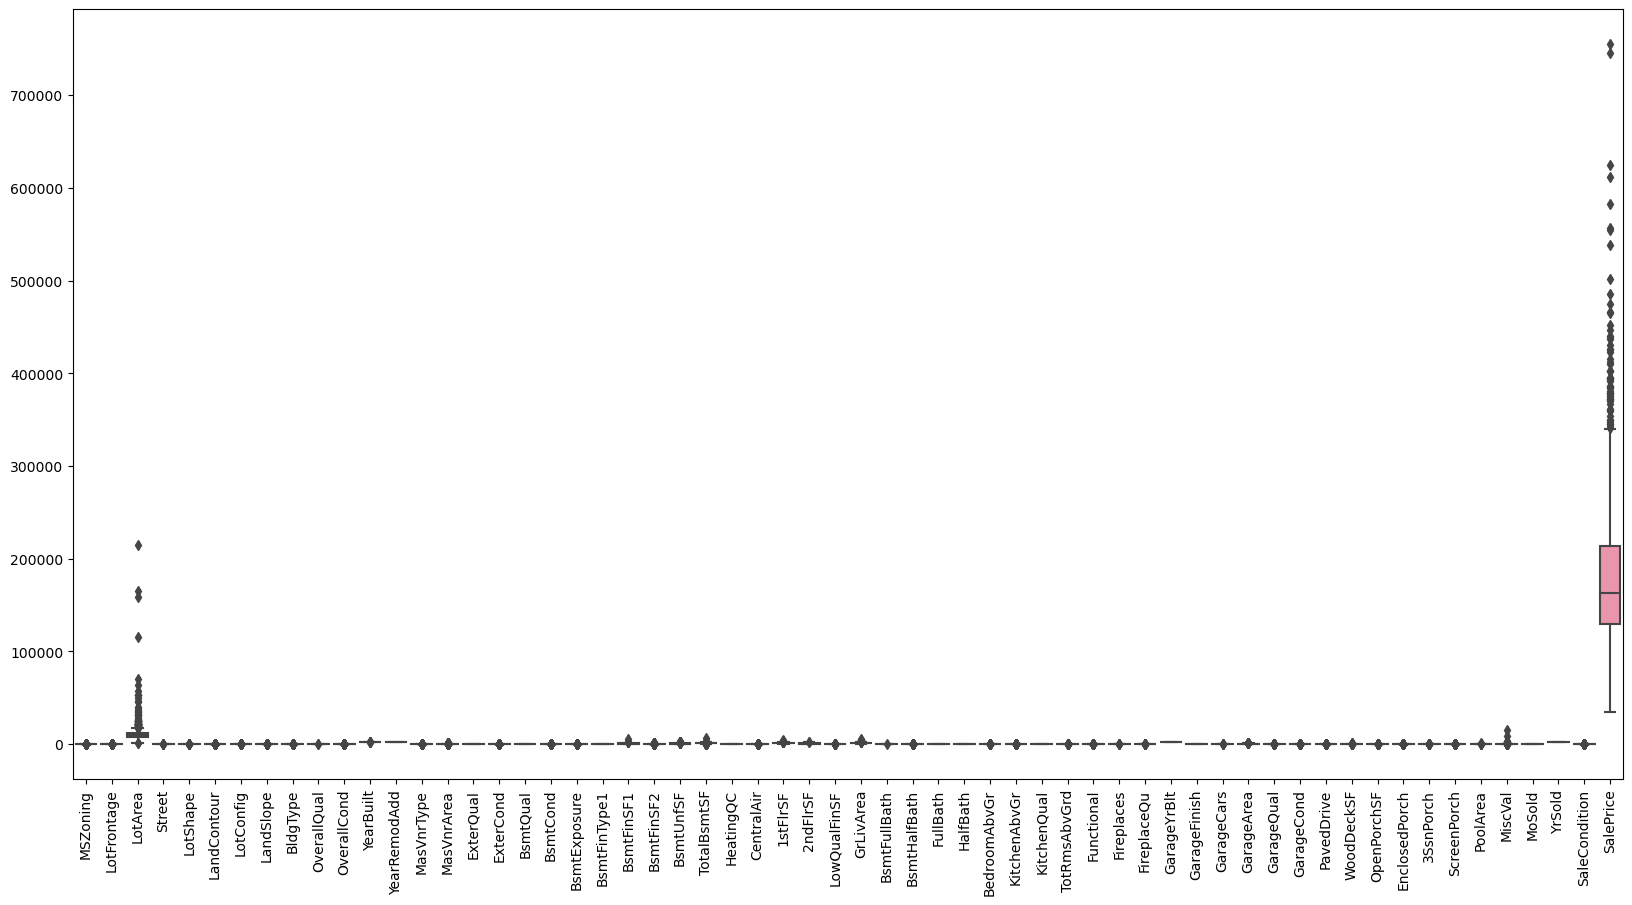

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.show();

## Imputer

In [28]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')

In [29]:
# List of categorical columns with missing values (after removal)
cat_cols_with_missing = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                         'BsmtFinType1', 'FireplaceQu', 'GarageFinish', 
                         'GarageQual', 'GarageCond', 'MSZoning', 
                         'KitchenQual', 'Functional']

# Categorical columns imputation
X_train[cat_cols_with_missing] = imp_cat.fit_transform(X_train[cat_cols_with_missing])
X_test[cat_cols_with_missing] = imp_cat.transform(X_test[cat_cols_with_missing])

In [30]:
# List of numerical columns with missing values
num_cols_with_missing = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                         'GarageYrBlt', 'GarageCars', 'GarageArea', 'BldgType']

# Numerical columns imputation
X_train[num_cols_with_missing] = imp_num.fit_transform(X_train[num_cols_with_missing])
X_test[num_cols_with_missing] = imp_num.transform(X_test[num_cols_with_missing])

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 619 to 685
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1168 non-null   float64
 1   LotFrontage    1168 non-null   float64
 2   LotArea        1168 non-null   int64  
 3   Street         1168 non-null   int64  
 4   LotShape       1168 non-null   int64  
 5   LandContour    1168 non-null   int64  
 6   LotConfig      1168 non-null   int64  
 7   LandSlope      1168 non-null   int64  
 8   BldgType       1168 non-null   float64
 9   OverallQual    1168 non-null   int64  
 10  OverallCond    1168 non-null   int64  
 11  YearBuilt      1168 non-null   int64  
 12  YearRemodAdd   1168 non-null   int64  
 13  MasVnrType     1168 non-null   float64
 14  MasVnrArea     1168 non-null   float64
 15  ExterQual      1168 non-null   int64  
 16  ExterCond      1168 non-null   int64  
 17  BsmtQual       1168 non-null   float64
 18  BsmtCond    

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 530 to 62
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       292 non-null    float64
 1   LotFrontage    292 non-null    float64
 2   LotArea        292 non-null    int64  
 3   Street         292 non-null    int64  
 4   LotShape       292 non-null    int64  
 5   LandContour    292 non-null    int64  
 6   LotConfig      292 non-null    int64  
 7   LandSlope      292 non-null    int64  
 8   BldgType       292 non-null    float64
 9   OverallQual    292 non-null    int64  
 10  OverallCond    292 non-null    int64  
 11  YearBuilt      292 non-null    int64  
 12  YearRemodAdd   292 non-null    int64  
 13  MasVnrType     292 non-null    float64
 14  MasVnrArea     292 non-null    float64
 15  ExterQual      292 non-null    int64  
 16  ExterCond      292 non-null    int64  
 17  BsmtQual       292 non-null    float64
 18  BsmtCond      

# Scaling

In [33]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

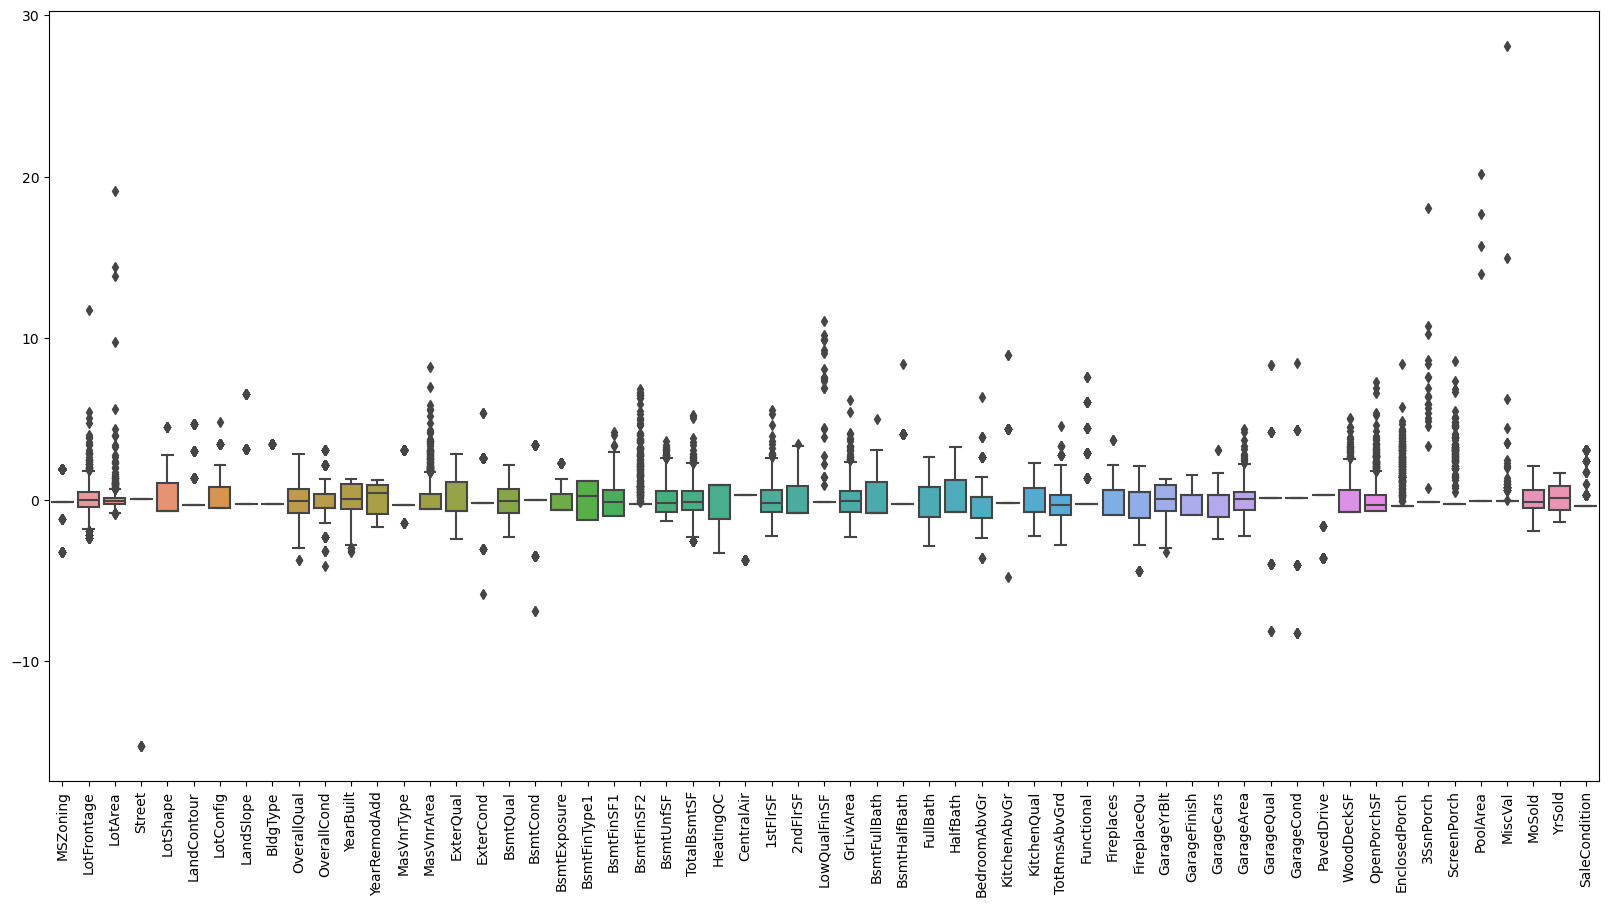

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show();

# Prediction-Regressors

In [35]:
regr_results = pd.DataFrame([])

In [36]:
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_pred = linear_regr.predict(X_test)

In [37]:
print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred),3)))

r2 score (coefficient of determination): 0.653
RMSE : 48946.193
MAE : 21996.874


# print(y_pred)

In [38]:
comparison = pd.DataFrame([])
comparison['y_actual'] = y_test
comparison['y_predicted'] = y_pred
comparison.head()

,y_actual,y_predicted
Id,,
530,200624,227551.540614
492,133000,142923.613145
460,110000,111270.887743
280,192000,218413.290434
656,88000,116466.161535


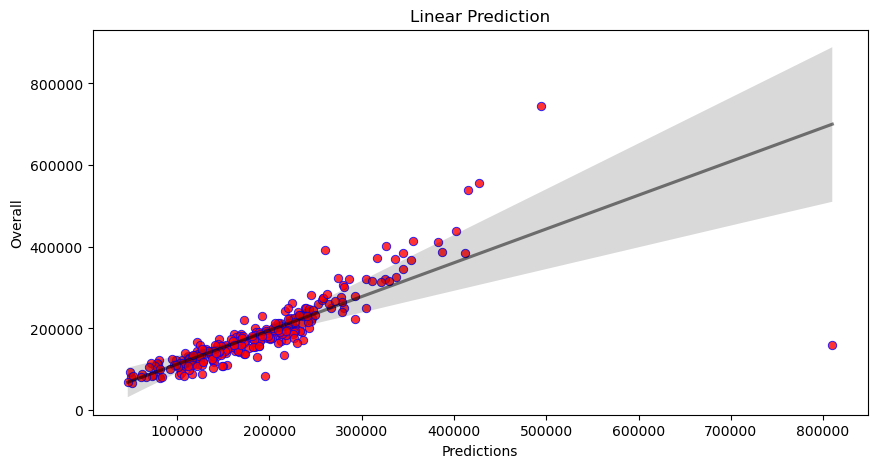

In [39]:
plt.figure(figsize=(10,5))
sns.regplot(x= y_pred, y = y_test, 
            scatter_kws={'color':'red',
                         'edgecolor':'blue',
                         'linewidths':0.7},
            line_kws={'color':'black','alpha':0.5}
           )
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction")
plt.show()

In [40]:
regr_results = pd.concat([regr_results, pd.json_normalize({'Model': 'Linear model (OLS)',
                                                           'r2':   round(r2_score(y_test, y_pred),3), 
                                                           'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)),3),
                                                           'MAE':  round(mean_absolute_error(y_test, y_pred),3)})])

regr_results

,Model,r2,RMSE,MAE
0,Linear model (OLS),0.653,48946.193,21996.874


In [41]:
print('Slope: ' ,     linear_regr.coef_)
print('\nIntercept:', linear_regr.intercept_)

Slope:  [-2.05716902e+03  2.34924948e+03  3.72438760e+03  1.70121083e+03
  1.73477528e+03  1.92455823e+02  1.69273998e+02 -2.28383860e+02
 -2.52569638e+03  1.34919376e+04  5.71542266e+03  1.77530248e+03
 -4.73499738e+02  1.28963439e+03  5.52331636e+03  6.21381664e+03
 -6.88731853e+02  6.87944392e+03 -9.28313441e+01  3.83157540e+03
  4.48999155e+02 -2.32859902e+16 -8.36109514e+15 -2.34178109e+16
  2.20532911e+16  2.15838166e+03 -9.66083713e+02  1.83009122e+16
  2.14787061e+16  2.51000339e+15 -2.51878996e+16  1.89276729e+02
 -3.95251924e+02  1.41544457e+03  1.54422090e+03 -5.23020974e+03
 -4.71884949e+03  5.32720721e+03  5.84950151e+03 -2.39928604e+03
  3.87891300e+03  2.09442683e+03 -7.41215676e+02  3.42839791e+02
  5.58961614e+02  5.31030295e+03  2.07871333e+03 -1.17348374e+03
 -6.55736781e+02  2.02250276e+03 -4.78249406e+02 -6.07786756e+02
  5.86544723e+02  1.41278729e+03  5.65455642e+02  2.69620209e+02
 -1.38295507e+03  1.73460901e+02  4.72297172e+03]

Intercept: 180816.57940504467


In [42]:
coef = pd.DataFrame({'Columns':X_train.columns,
                     'Coefficient Estimate':pd.Series(linear_regr.coef_)
                    })
coef.head(10)

,Columns,Coefficient Estimate
0,MSZoning,-2057.169023
1,LotFrontage,2349.249484
2,LotArea,3724.387596
3,Street,1701.210829
4,LotShape,1734.775282
5,LandContour,192.455823
6,LotConfig,169.273998
7,LandSlope,-228.383860
8,BldgType,-2525.696376
9,OverallQual,13491.937627


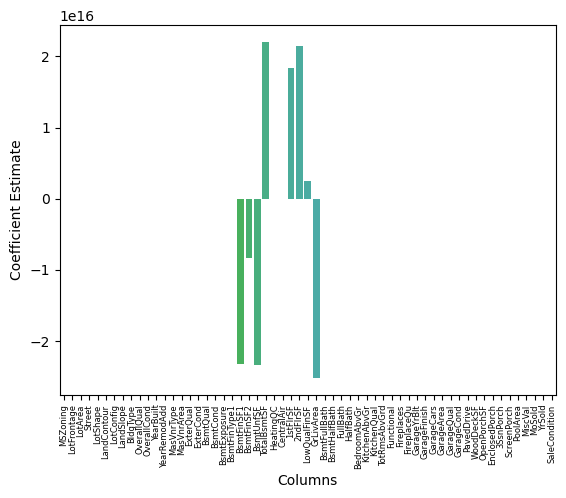

In [43]:
sns.barplot(data=coef, x='Columns', y='Coefficient Estimate')
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [44]:
import statsmodels.api as sm

y_train_array = np.array(y_train)
X_train_const = sm.add_constant(X_train)

ols_model = sm.OLS(y_train_array, X_train_const)
results = ols_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:52:13   Log-Likelihood:                -13637.
No. Observations:                1168   AIC:                         2.739e+04
Df Residuals:                    1110   BIC:                         2.768e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.808e+05    854.569    211.579

# Reguralization

In [45]:
ridge_regr = Ridge(alpha=0.1)
ridge_regr.fit(X_train, y_train)
y_pred = ridge_regr.predict(X_test)

In [46]:
coef_ridge = pd.DataFrame({"var": X_train.columns,
                           "coef":ridge_regr.coef_[0]})
coef_ridge

,var,coef
0,MSZoning,-2061.235414
1,LotFrontage,-2061.235414
2,LotArea,-2061.235414
3,Street,-2061.235414
4,LotShape,-2061.235414
5,LandContour,-2061.235414
6,LotConfig,-2061.235414
7,LandSlope,-2061.235414
8,BldgType,-2061.235414
9,OverallQual,-2061.235414


In [47]:
ridgeCV_model = RidgeCV(alphas=np.logspace(-6, 6, 13), scoring='r2', cv=10)
ridgeCV_model.fit(X_train, y_train)

optimal_alpha = ridgeCV_model.alpha_
print(optimal_alpha)

100.0


In [48]:
ridge_optmodel = Ridge(alpha = optimal_alpha)
ridge_optmodel.fit(X_train, y_train)
y_pred_opt = ridge_optmodel.predict(X_test)


In [49]:
coef_ridge = pd.DataFrame({"var": X_train.columns,
                           "coef":ridge_optmodel.coef_})
coef_ridge

,var,coef
0,MSZoning,-1891.281220
1,LotFrontage,2404.060591
2,LotArea,3528.010524
3,Street,1626.335763
4,LotShape,1785.412248
5,LandContour,205.906688
6,LotConfig,185.085020
7,LandSlope,-6.907643
8,BldgType,-2327.728334
9,OverallQual,12152.009195


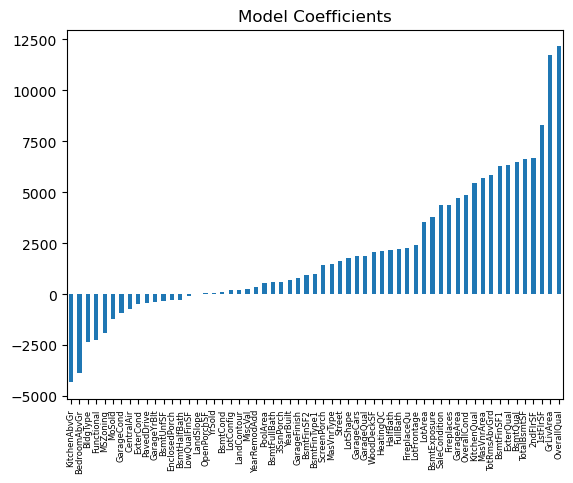

In [50]:
coef = pd.Series(ridge_optmodel.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [51]:
regr_results = pd.concat([regr_results, pd.json_normalize({'Model': 'Ridge',
                                                            'r2':   round(r2_score(y_test, y_pred_opt),3), 
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_opt),3)})])

regr_results

,Model,r2,RMSE,MAE
0,Linear model (OLS),0.653,48946.193,21996.874
0,Ridge,0.667,47973.488,21843.681


In [52]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


In [53]:
print("Training score:", lasso.score(X_train, y_train))
print("Testing score:",  lasso.score(X_test, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, y_pred), '\n')

Training score: 0.8683407957324363
Testing score: 0.6531171433592671
MAE of Lasso Regression: 21993.278299663554 



In [54]:
coef_lasso = pd.DataFrame({"var": X_train.columns, 
                           "coef":lasso.coef_})

#show the dataframe
coef_lasso

,var,coef
0,MSZoning,-2061.336118
1,LotFrontage,2350.702587
2,LotArea,3717.853740
3,Street,1701.214124
4,LotShape,1738.315407
5,LandContour,194.698505
6,LotConfig,169.845924
7,LandSlope,-235.229302
8,BldgType,-2521.482206
9,OverallQual,13476.237116


In [55]:
lassoCV_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10, random_state=0) 
lassoCV_model.fit(X_train, y_train)

optimal_alpha = lassoCV_model.alpha_
print(optimal_alpha)

1000.0


In [56]:
lasso_optmodel = Lasso(alpha = optimal_alpha)
lasso_optmodel.fit(X_train, y_train)
y_pred_opt = lasso_optmodel.predict(X_test)

print("Training score:", lasso.score(X_train, y_train))
print("Testing score:",  lasso.score(X_test, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, y_pred), '\n')

Training score: 0.8683407957324363
Testing score: 0.6531171433592671
MAE of Lasso Regression: 21993.278299663554 



In [57]:
print('Model coefficients:', lasso_optmodel.coef_)

Model coefficients: [-1.62457959e+03  2.12688156e+03  3.21008786e+03  4.40688650e+02
  1.69477088e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.39990682e+03  1.49381946e+04  3.98271728e+03  0.00000000e+00
  5.10467818e+00  8.18150908e+02  5.18851461e+03  6.55465252e+03
 -0.00000000e+00  7.37161458e+03  0.00000000e+00  3.63544381e+03
  9.83068782e+01  7.47822867e+03  3.22655874e+02 -0.00000000e+00
  5.95989024e+03  1.28769891e+03  0.00000000e+00  2.44283496e+03
  0.00000000e+00 -1.05960621e+02  2.27752297e+04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.98921809e+02 -1.66688639e+03
 -3.19681723e+03  6.19235318e+03  2.47808257e+03 -1.51188559e+03
  3.30848442e+03  5.91776550e+02  0.00000000e+00  7.08262950e+02
  5.09761289e+02  5.44306705e+03  4.05366478e+02 -0.00000000e+00
  0.00000000e+00  1.34023090e+03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.09456952e+02  0.00000000e+00  0.00000000e+00
 -4.91334395e+02  0.00000000e+00  3.96569502e+03]


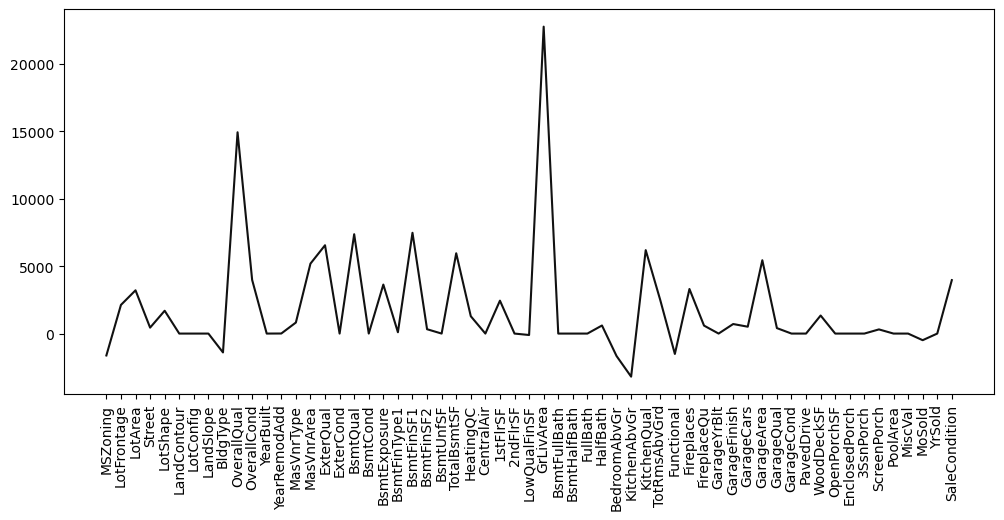

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(X_train.columns, lasso_optmodel.coef_, color='#111111')

plt.setp(ax.get_xticklabels(), rotation=90);

In [59]:
#extract the coefficients
coef_lasso = pd.DataFrame({"var": X_train.columns, 
                           "coef":lasso_optmodel.coef_})

coef_lasso

,var,coef
0,MSZoning,-1624.579590
1,LotFrontage,2126.881555
2,LotArea,3210.087856
3,Street,440.688650
4,LotShape,1694.770877
5,LandContour,0.000000
6,LotConfig,0.000000
7,LandSlope,0.000000
8,BldgType,-1399.906824
9,OverallQual,14938.194581


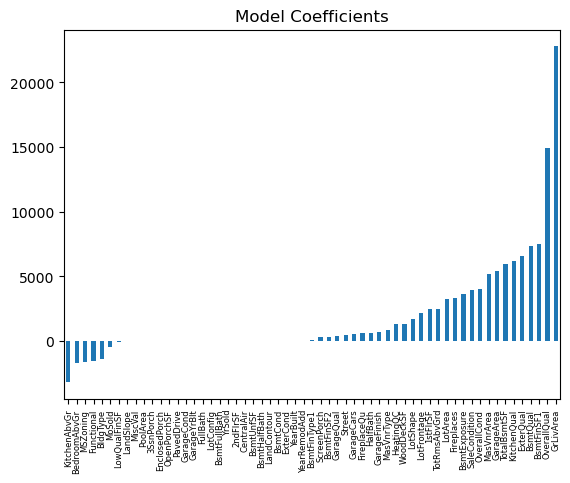

In [60]:
coef = pd.Series(lasso_optmodel.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [61]:
regr_results = pd.concat([regr_results, pd.json_normalize({'Model': 'Lasso',
                                                            'r2':   round(r2_score(y_test, y_pred_opt),3), 
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_opt),3)})])

regr_results

,Model,r2,RMSE,MAE
0,Linear model (OLS),0.653,48946.193,21996.874
0,Ridge,0.667,47973.488,21843.681
0,Lasso,0.663,48231.708,21908.029


# Polynomial Regression

In [62]:
polynomial_features= PolynomialFeatures(degree=3)

X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly  = polynomial_features.transform(X_test)

In [63]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_poly),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_poly)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_poly),3)))

r2 score (coefficient of determination): -0.692
RMSE : 108086.976
MAE : 27001.161


In [64]:
regr_results = pd.concat([regr_results, pd.json_normalize({'Model': 'Poly',
                                                            'r2':   round(r2_score(y_test, y_pred_poly),3), 
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_poly)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_poly),3)})])

regr_results

,Model,r2,RMSE,MAE
0,Linear model (OLS),0.653,48946.193,21996.874
0,Ridge,0.667,47973.488,21843.681
0,Lasso,0.663,48231.708,21908.029
0,Poly,-0.692,108086.976,27001.161


# Other non-linear models

In [65]:
rr  = RandomForestRegressor(random_state=0)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred),3)))

r2 score (coefficient of determination): 0.844
RMSE : 32802.469
MAE : 17327.141


In [66]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(10,200,10)],
               'max_depth': [int(x) for x in np.linspace(10,100,10)],
               'min_samples_split': [2,3,4,5,10],
               'min_samples_leaf':  [1,2,4,10,15,20]}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter=10,
                               cv = 5, 
                               n_jobs=-1)

rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [67]:
rf_opt = rf_random.best_estimator_
rf_opt.fit(X_train,y_train)
y_pred_opt = rf_opt.predict(X_test)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_opt),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_opt),3)))

r2 score (coefficient of determination): 0.841
RMSE : 33171.48
MAE : 17372.464


# Final Comparison

In [68]:
regr_results = pd.concat([regr_results, pd.json_normalize({'Model': 'RFRegressor',
                                                            'r2':   round(r2_score(y_test, y_pred_opt),3), 
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_opt),3)})])

regr_results

,Model,r2,RMSE,MAE
0,Linear model (OLS),0.653,48946.193,21996.874
0,Ridge,0.667,47973.488,21843.681
0,Lasso,0.663,48231.708,21908.029
0,Poly,-0.692,108086.976,27001.161
0,RFRegressor,0.841,33171.480,17372.464


In [69]:
regr_results.sort_values(by=['RMSE'], ascending=[True])

,Model,r2,RMSE,MAE
0,RFRegressor,0.841,33171.480,17372.464
0,Ridge,0.667,47973.488,21843.681
0,Lasso,0.663,48231.708,21908.029
0,Linear model (OLS),0.653,48946.193,21996.874
0,Poly,-0.692,108086.976,27001.161


In [70]:
rr_p  = RandomForestRegressor(random_state=0)
rr_p.fit(X_train, y_train)
Predicted_SalePrice = rr_p.predict(unknown)
unknown['Predicted_SalePrice'] = Predicted_SalePrice
unknown.head(10)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,Predicted_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,4.0,80.0,11622,1,0,0,0,0,0.0,5,...,0,0,0,120,0,0,6,2010,0,456479.44
1462,5.0,81.0,14267,1,1,0,1,0,0.0,6,...,36,0,0,0,0,12500,6,2010,0,500407.47
1463,5.0,74.0,13830,1,1,0,0,0,0.0,5,...,34,0,0,0,0,0,3,2010,0,501968.12
1464,5.0,78.0,9978,1,1,0,0,0,0.0,6,...,36,0,0,0,0,0,6,2010,0,558882.80
1465,5.0,43.0,5005,1,1,2,0,0,3.0,8,...,82,0,0,144,0,0,1,2010,0,435380.00
1466,5.0,75.0,10000,1,1,0,1,0,0.0,6,...,84,0,0,0,0,0,4,2010,0,510617.75
1467,5.0,NaN,7980,1,1,0,0,0,0.0,6,...,21,0,0,0,0,500,3,2010,0,456240.65
1468,5.0,63.0,8402,1,1,0,0,0,0.0,6,...,75,0,0,0,0,0,5,2010,0,503680.27
1469,5.0,85.0,10176,1,0,0,0,0,0.0,7,...,0,0,0,0,0,0,2,2010,0,458348.55


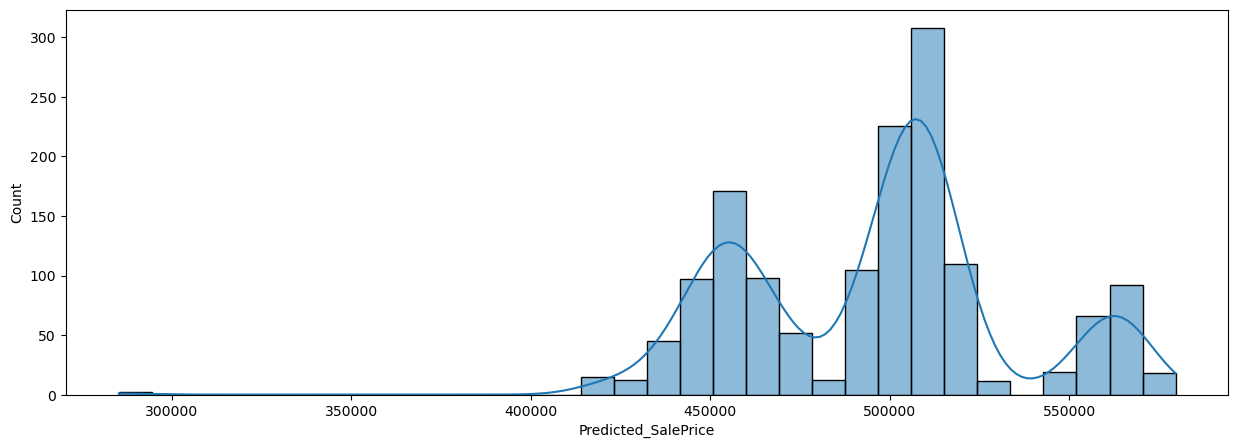

In [71]:
plt.figure(figsize=(15, 5))
sns.histplot(data=unknown, x="Predicted_SalePrice", kde=True)
plt.show()